# Photoshop Blend Modes with Python numpy

In [1]:
from PIL import Image
from IPython.display import display
from io import BytesIO
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

Some utility functions we need later on

In [2]:
# Display ndarray as image using matplotlib
def display_img(img_data):
    img = Image.fromarray(img_data)
    display(img)

def convert_uint_to_float(img_data):
    return img_data / 255
    
def convert_float_to_uint(img_data):
    return round_to_uint(img_data * 255)

def round_to_uint(img_data):
    return np.round(img_data).astype('uint8')

# A utility function to convert hex string to a tuple of RGB
def hex_to_rgb(hex_string):
    return np.array(list(int(hex_string.lstrip('#')[i:i+2], 16) for i in (0, 2, 4)))

def hex_to_rgb_float(hex_string):
    return np.array(list((int(hex_string.lstrip('#')[i:i+2], 16) / 255) for i in (0, 2, 4)))

def get_array_from_hex(hex_string, height, width):
    rgb_as_float = hex_to_rgb_float(hex_string)
    return np.full((height, width, 3), rgb_as_float)

## Load and display an image file

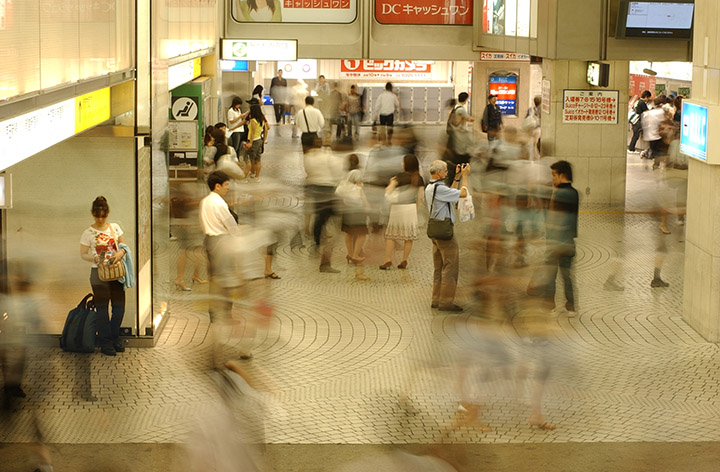

In [3]:
image01_url = "https://github.com/subwaymatch/layer-is-python/blob/master/images/image02.jpg?raw=true"
response = requests.get(image01_url)
image01 = Image.open(BytesIO(response.content))

display(image01)

## PIL to Numpy conversions

### Read an image as a Numpy ndarray

In [4]:
image01_data = np.asarray(image01)
type(image01_data)

numpy.ndarray

### Numpy array into PIL image

In [5]:
img = Image.fromarray(image01_data, 'RGB')
# display(img)

### Numpy array of unsigned int pixel values to float values (0 ~ 1)

In [6]:
image01_float_data = convert_uint_to_float(image01_data)

## Convert image to grayscale

In [7]:
image01_gray = np.dot(image01_data[...,:3], [0.2989, 0.5870, 0.1140])
image01_gray_data = np.stack((round_to_uint(image01_gray),)*3, axis=-1)

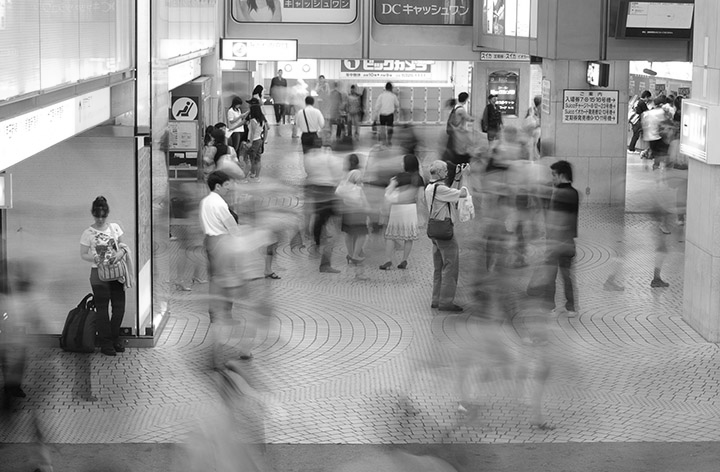

In [8]:
display_img(image01_gray_data)

## Blend Mode Operations

### Darken Operations

#### Darken

```
min(A, B)
```

In [26]:
lighten_hex = '#e6ba81'
rgb = hex_to_rgb(lighten_hex)

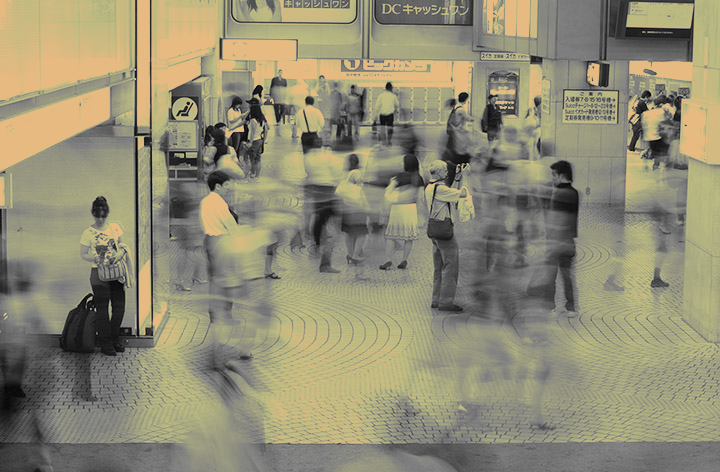

In [10]:
image01_darken = round_to_uint(np.minimum(image01_gray_data, rgb))
display_img(image01_darken)

#### Multiply

```
A * B
```

In [11]:
bright_hex = '#59ff74'
rgb_as_float = hex_to_rgb_float(bright_hex)

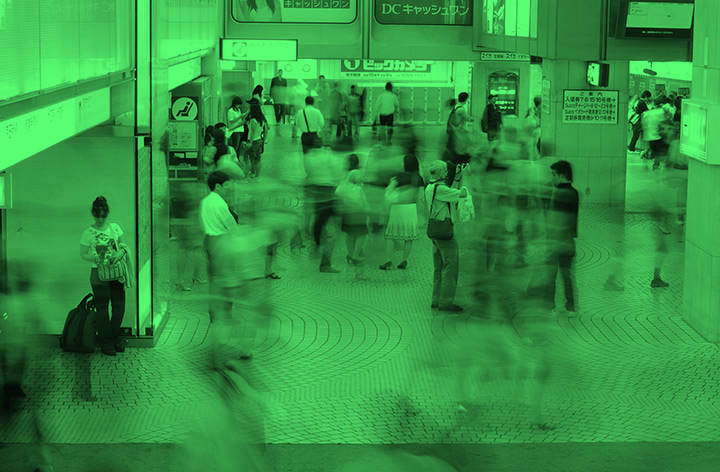

In [12]:
image01_multiply = round_to_uint(image01_gray_data * rgb_as_float)
display_img(image01_multiply)

#### Color Burn

```
If B = 0: 0
Else: 1 - (1 - A) / B
```

In [13]:
color_burn_hex = '#b3dcff'
rgb_as_float = hex_to_rgb(color_burn_hex)
print(rgb_as_float)

[179 220 255]


In [14]:
colur_burn_color_array = get_array_from_hex(color_burn_hex, image01_data.shape[0], image01_data.shape[1])
image01_soft_light = np.where(soft_light_data > 0, data01, 0)

### Lighten Operations

#### Lighten

```
max(A, B)
```

In [15]:
lighten_hex = '#e6ba81'
rgb = hex_to_rgb(lighten_hex)

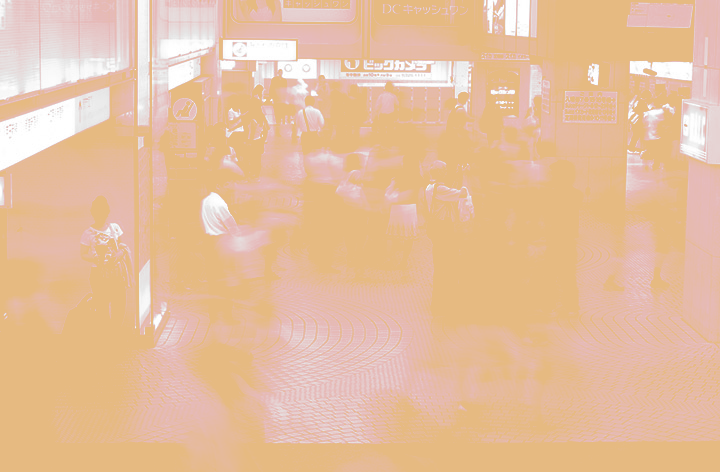

In [16]:
image01_lighten = round_to_uint(np.maximum(image01_gray_data, rgb))
display_img(image01_lighten)

### Contrast Operations

A combination of multiply and screen

#### Overlay

A combination of multiply and screen

```
If A <= 0.5: (2 * A) * B
If A > 0.5: 1 - 2 * (1 - A) * (1 - B)
```

In [17]:
overlay_hex = '#9facd6'
rgb_as_float = hex_to_rgb_float(overlay_hex)

In [18]:
data01 = (2 * image01_float_data) * rgb_as_float
data02 = 1 - 2 * (1 - image01_float_data) * (1 - rgb_as_float)

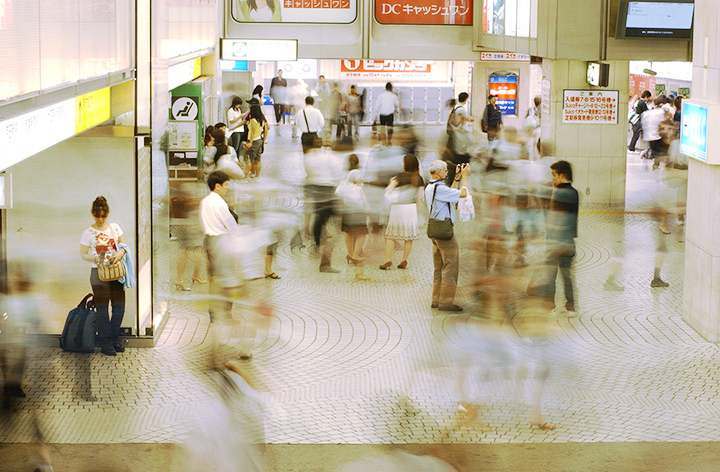

In [19]:
image01_overlay = np.where(image01_float_data <= 0.5, data01, data02)
display_img(convert_float_to_uint(image01_overlay))

#### Soft Light

This mode has nothing in common with the hard light mode (except for its name), but the result is similar to overlay mode.

```
If B <= 0.5: 2 * A * B + A^2 * (1 - 2 * B)
If B > 0.5: sqrt(A) * (2 * B - 1) + (2 * A) * (1 - B)
```

In [20]:
soft_light_hex = '#274c7f'

In [21]:
soft_light_color_array = get_array_from_hex(soft_light_hex, image01_data.shape[0], image01_data.shape[1])

a = image01_float_data
b = rgb_as_float

data01 = 2 * a * b + np.square(a) * (1 - 2 * b)
data02 = np.sqrt(a) * (2 * b - 1) + (2 * a) * (1 - b)

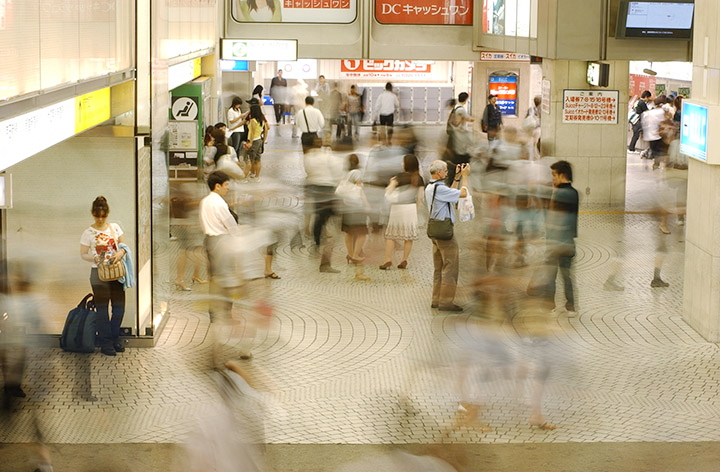

In [22]:
image01_soft_light = np.where(soft_light_color_array <= 0.5, data01, data02)
display_img(convert_float_to_uint(image01_soft_light))

#### Hard Light

This mode corresponds exactly to Overlay with the layers swapped. If the color application or the upper layer is lighter than 50% gray, the background gets lightened, otherwise darkened.

```
If (B <= 0.5): (2 * A) * B
If (B > 0.5): 1 - 2 * (1 - A) * (1 - B)
```

In [23]:
hard_light_hex = '#931919'
rgb_as_float = hex_to_rgb_float(hard_light_hex)

In [24]:
hard_light_color_array = get_array_from_hex(hard_light_hex, image01_data.shape[0], image01_data.shape[1])

data01 = (2 * image01_float_data) * rgb_as_float
data02 = 1 - 2 * (1 - image01_float_data) * (1 - rgb_as_float)

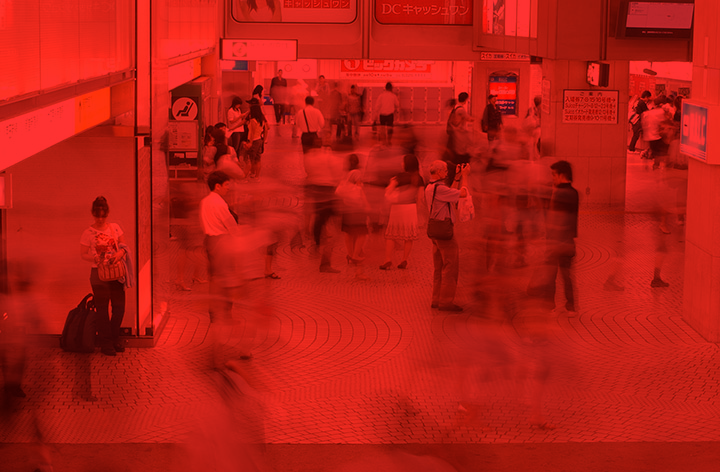

In [25]:
image01_hard_light = np.where(hard_light_color_array <= 0.5, data01, data02)
display_img(convert_float_to_uint(image01_hard_light))

#### Vivid Light

